In [2]:
import tensorflow as tf



In [4]:
x=tf.constant([1.9, 2.0, 12.1, 6.0, 5.0, 6.9])
y=tf.constant([1.3, 1.0, 8.4, 3.5, 4, 3.9])

print('Elements in array x')
with tf.name_scope ("ElementsOfArray_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    
print('Elements in array y')
with tf.name_scope ("ElementsOfArray_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)

Elements in array x
1.9
2.0
12.1
6.0
5.0
6.9
Elements in array y
1.3
1.0
8.4
3.5
4.0
3.9


In [5]:
sum1=tf.constant(0)

with tf.name_scope("Mean_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output =sess.run(x[i])
            sum1=tf.add(sum1,output, name="AddX")
        a=tf.divide(sum1,len(sess.run(x)), name="DivideByN")
        avgx=sess.run(a)
    print('Mean of x')
    print(avgx)

sum1=tf.constant(0)
with tf.name_scope("Mean_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output =sess.run(y[i])
            sum1=tf.add(sum1,output, name="AddY")
        a=tf.divide(sum1,len(sess.run(y)), name="DivideByN")
        avgy=sess.run(a)
    print('Mean of y')
    print(avgy)


Mean of x
5.33333333333
Mean of y
3.33333333333


In [6]:
#Calculate variance for x
var=tf.constant(0.0)
with tf.name_scope("Calculate_Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
        vari=sess.run(var)
print('Variance of x')
print(vari)


Variance of x
71.6967


In [8]:
#Calculate covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Calculate_Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="AddThem")
        covar=sess.run(cov)
print('Covariance of x,y')
print(covar)
        

Covariance of x,y
49.82


In [9]:
#Calculate value of c

with tf.name_scope("Calculate_c"):
    with tf.Session() as sess:
        temp=tf.divide(cov,var)
        const_c=sess.run(temp)
        print('Value of c')
print(const_c)


Value of c
0.694872


In [10]:
#Calculate value of m 
with tf.name_scope("Calculate_slope"):
    c=tf.to_float(const_c)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    slope=tf.subtract(f,e)
    with tf.Session() as sess:
        slope=sess.run(f)
print('The value of m')
print(slope)

The value of m
3.33333


In [11]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [12]:
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
train_X = numpy.asarray(x1)
train_Y = numpy.asarray(y1)


ranX=tf.constant([1.8, 2.0, 3.1, 4.0, 5.0, 6.8])
with tf.Session() as sess:
    ranX1=sess.run(ranX)
ranX2=numpy.asarray(ranX1)

ranY=[0]*6
    
with tf.Session() as sess:
        for i in range(len(sess.run(ranX))):
            output = sess.run(ranX[i])
            a=tf.multiply(output,slope)
            b=tf.add(a,const_c)
            ranY[i]=sess.run(b)
print(ranY)
            


[6.6948714, 7.3615384, 11.028205, 14.028205, 17.361538, 23.361538]


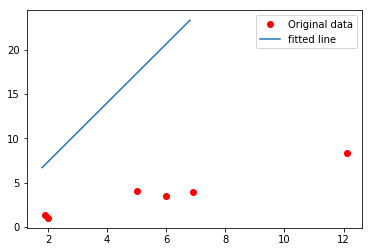

In [13]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(ranX2,ranY, label='fitted line')
plt.legend()
plt.show()